In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None

## Importing a spreadsheet
- Here we import MELTS models which have already been reformatted (e.g. in supporting information)

In [2]:
df_out=ss.import_data('Dataset_S1.xlsx', sheet_name='MELTS_Model_01H2O', suffix="_Liq")
df_out.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Temp (K) MELTS,FeO,Fe2O3,H2O_Incom,Temp_HT1987_C,Factor,H2O_test
0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.101655,0.0,0.0,0.0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.248535,0.101655,1445.220313,9.447747,1.852481,0.514405,1148.639387,1.000000,0.514405
1,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.0,0.250895,0.102621,0.0,0.0,0.0,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.250895,0.102621,1443.220313,9.475545,1.854419,0.519548,1146.706750,1.009998,0.519548
2,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.0,0.253478,0.103677,0.0,0.0,0.0,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.253478,0.103677,1441.220313,9.505299,1.856348,0.524889,1144.608472,1.020381,0.524889
3,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.0,0.257120,0.105167,0.0,0.0,0.0,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.257120,0.105167,1439.220313,9.568634,1.864716,0.535182,1142.809538,1.040389,0.535182
4,51.481354,2.721741,13.714324,11.384440,0.196378,6.342291,10.585430,2.491197,0.510364,0.0,0.262582,0.107401,0.0,0.0,0.0,51.481354,2.721741,13.714324,11.384440,0.196378,6.342291,10.585430,2.491197,0.510364,0.262582,0.107401,1437.220313,9.688901,1.884351,0.546507,1141.480047,1.062405,0.546507


In [4]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=df_out, T_K=df_out['Temp (K) MELTS'], 
P_kbar=5, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Temp (K) MELTS,FeO,Fe2O3,H2O_Incom,Temp_HT1987_C,Factor,H2O_test
0,1006.245025,274.875727,1445.220313,5,0.65,0.0,0.482131,0.018332,0.149400,0.093565,0.001475,0.087091,0.0,0.110173,0.043725,0.005783,0.001971,0.006353,-13288.030247,-205.692099,-2756.471303,-1307.074423,-2984.966261,-862.748286,-579.220341,-167.791897,-111.154327,4894.578758,-13497.943762,-196.425413,-2838.589393,-1357.863277,-3039.060117,-973.005312,-599.594834,-165.301774,-112.875131,4946.976633,6.913981,0.65,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.101655,0.0,0.0,0.0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.248535,0.101655,1445.220313,9.447747,1.852481,0.514405,1148.639387,1.000000,0.514405
1,998.862288,272.858987,1443.220313,5,0.65,0.0,0.482248,0.018470,0.150426,0.092240,0.001489,0.087339,0.0,0.109427,0.044117,0.005839,0.001991,0.006415,-13291.246596,-207.240432,-2775.399112,-1288.559744,-2993.474585,-856.902923,-584.413035,-169.417687,-112.231338,4909.718330,-13501.210920,-197.903992,-2858.081079,-1338.629174,-3047.722630,-966.412926,-604.970184,-166.903437,-113.968815,4962.278279,6.906617,0.65,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.0,0.250895,0.102621,0.0,0.0,0.0,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.250895,0.102621,1443.220313,9.475545,1.854419,0.519548,1146.706750,1.009998,0.519548
2,991.146818,270.751353,1441.220313,5,0.65,0.0,0.482381,0.018619,0.151541,0.090800,0.001505,0.087604,0.0,0.108610,0.044546,0.005900,0.002011,0.006482,-13294.921234,-208.918471,-2795.977857,-1268.446550,-3002.550437,-850.505211,-590.088924,-171.197017,-113.410061,4925.965507,-13504.943607,-199.506433,-2879.272887,-1317.734445,-3056.962955,-959.197603,-610.845726,-168.656361,-115.165786,4978.699387,6.898863,0.65,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.0,0.253478,0.103677,0.0,0.0,0.0,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.253478,0.103677,1441.220313,9.505299,1.856348,0.524889,1144.608472,1.020381,0.524889
3,988.661837,270.072532,1439.220313,5,0.65,0.0,0.482604,0.018845,0.152072,0.089578,0.001527,0.088188,0.0,0.107632,0.044952,0.005985,0.002041,0.006578,-13301.076921,-211.445793,-2805.768052,-1251.375396,-3022.555034,-842.848438,-595.464089,-173.640911,-115.076301,4961.080894,-13511.196537,-201.919896,-2889.354741,-1299.999958,-3077.330078,-950.562314,-616.409967,-171.063986,-116.857822,5014.190694,6.896352,0.65,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.0,0.257120,0.105167,0.0,0.0,0.0,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.257120,0.105167,1439.220313,9.568634,1.864716,0.535182,1142.809538,1.040389,0.535182
4,995.268759,271.877343,1437.220313,5,0.65,0.0,0.482965,0.019201,0.151633,0.088700,0.001560,0.089316,0.0,0.106398,0.045312,0.006108,0.002085,0.006721,-13311.011669,-215.450181,-2797.678737,-1239.105910,-3061.222608,-833.185318,-600.243103,-177.224167,-117.582009,5028.300948,-13521.288226,-205.743881,-2881.024437,-1287.253718,-3116.698390,-939.664272,-621.357086,-1

Text(0.5, 0, 'FeO$_{T}$ Liq (Wt%)')

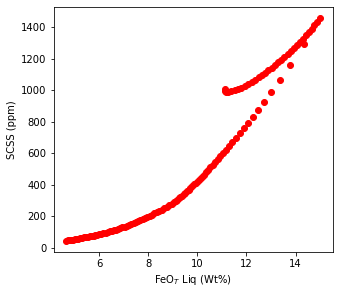

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4.5), sharey=True)
ax1.plot(Smythe_CalcSulf['FeOt_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         'or')

ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

## Second example 
- Here we load measured glass contents to calculate the SCSS for each sample

In [6]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq", sample_label='Sample_ID_Liq')
df_out2.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,Sample_ID,SiO2,Na2O,K2O,FeOt,Cr2O3,MnO,CaO,TiO2,MgO,Al2O3,P2O5,Total
0,50.822,2.056,13.235,13.339,0.252,6.631,11.356,2.490,0.247,0.040,0.189,0.0,0.0,0.0,0.0,H_1,50.822,2.490,0.247,13.339,0.04,0.252,11.356,2.056,6.631,13.235,0.189,100.7540
1,50.608,2.068,13.397,13.588,0.323,6.425,10.969,2.597,0.234,0.004,0.239,0.0,0.0,0.0,0.0,H_4,50.608,2.597,0.234,13.588,0.004,0.323,10.969,2.068,6.425,13.397,0.239,100.5429
2,50.427,2.081,13.276,13.806,0.231,6.516,11.222,2.577,0.232,0.046,0.176,0.0,0.0,0.0,0.0,H_7,50.427,2.577,0.232,13.806,0.046,0.231,11.222,2.081,6.516,13.276,0.176,100.6794
3,50.010,2.129,13.385,13.770,0.262,6.595,11.177,2.610,0.233,0.002,0.164,0.0,0.0,0.0,0.0,H_10,50.010,2.610,0.233,13.770,0.002,0.262,11.177,2.129,6.595,13.385,0.164,100.4291
4,49.588,2.065,13.120,13.099,0.237,6.459,10.832,2.593,0.227,0.031,0.222,0.0,0.0,0.0,0.0,H_13,49.588,2.593,0.227,13.099,0.031,0.237,10.832,2.065,6.459,13.120,0.222,98.5715


In [7]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=df_out, T_K=1400,
P_kbar=3, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=0.15)

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2,TiO2,Al2O3,FeOt,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,Temp (K) MELTS,FeO,Fe2O3,H2O_Incom,Temp_HT1987_C,Factor,H2O_test
0,911.592246,249.019449,1400,3,0.65,0.15,0.482132,0.018332,0.149400,0.093565,0.001475,0.074027,0.013061,0.110173,0.043726,0.005783,0.001971,0.006353,-13288.065448,-205.692644,-2756.478606,-1307.077885,-2537.228043,-862.750571,-579.221876,-167.792341,-111.154621,4160.413987,-13497.979519,-196.425934,-2838.596912,-1357.866874,-2583.207942,-973.007889,-599.596422,-165.302212,-112.875430,4204.952417,6.815193,0.65,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.0,0.248535,0.101655,0.15,0.0,0.0,51.456179,2.601690,13.529073,11.114610,0.185873,6.698477,10.974609,2.406926,0.483801,0.248535,0.101655,1445.220313,9.447747,1.852481,0.514405,1148.639387,1.000000,0.514405
1,907.968506,248.029553,1400,3,0.65,0.15,0.482249,0.018470,0.150426,0.092240,0.001489,0.074238,0.013098,0.109427,0.044118,0.005839,0.001991,0.006415,-13291.281905,-207.240982,-2775.406485,-1288.563167,-2544.460157,-856.905199,-584.414588,-169.418138,-112.231636,4173.282754,-13501.246788,-197.904517,-2858.088672,-1338.632730,-2590.571118,-966.415494,-604.971792,-166.903881,-113.969118,4217.958948,6.811210,0.65,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.0,0.250895,0.102621,0.15,0.0,0.0,51.458756,2.620771,13.619359,11.144152,0.187638,6.602326,10.898161,2.428038,0.488395,0.250895,0.102621,1443.220313,9.475545,1.854419,0.519548,1146.706750,1.009998,0.519548
2,903.958247,246.934071,1400,3,0.65,0.15,0.482382,0.018619,0.151542,0.090800,0.001505,0.074463,0.013138,0.108610,0.044546,0.005900,0.002011,0.006482,-13294.956660,-208.919028,-2795.985308,-1268.449930,-2552.174672,-850.507477,-590.090496,-171.197473,-113.410363,4187.092995,-13504.979593,-199.506964,-2879.280559,-1317.737956,-2598.425436,-959.200159,-610.847354,-168.656810,-115.166093,4231.917032,6.806783,0.65,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.0,0.253478,0.103677,0.15,0.0,0.0,51.462403,2.641448,13.717522,11.175642,0.189570,6.497934,10.814571,2.451116,0.493423,0.253478,0.103677,1441.220313,9.505299,1.856348,0.524889,1144.608472,1.020381,0.524889
3,904.162838,246.989959,1400,3,0.65,0.15,0.482606,0.018845,0.152072,0.089578,0.001527,0.074960,0.013225,0.107632,0.044952,0.005985,0.002041,0.006578,-13301.112600,-211.446361,-2805.775578,-1251.378752,-2569.178670,-842.850699,-595.465687,-173.641377,-115.076610,4216.941383,-13511.232779,-201.920438,-2889.362492,-1300.003445,-2615.737582,-950.564864,-616.411621,-171.064445,-116.858135,4262.084955,6.807009,0.65,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.0,0.257120,0.105167,0.15,0.0,0.0,51.469782,2.672548,13.761157,11.246506,0.192293,6.408435,10.713787,2.472653,0.500306,0.257120,0.105167,1439.220313,9.568634,1.864716,0.535182,1142.809538,1.040389,0.535182
4,911.742593,249.060519,1400,3,0.65,0.15,0.482966,0.019202,0.151634,0.088700,0.001560,0.075919,0.013395,0.106398,0.045313,0.006108,0.002085,0.006721,-13311.047831,-215.450766,-2797.686337,-1239.109276,-2602.046286,-833.187582,-600.244733,-177.224648,-117.582328,4274.079029,-13521.324960,-205.744440,-2881.032264,-1287.257215,-2649.200828,-939.666825,-621.358774,-174